In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import classification_report

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

## try on unbalanced data 

In [19]:
train_data_imb=pd.read_csv('HT9.csv')
train_data_imb.head()

,tweet,OFF,VLG,VIO,HS_HS1,HS_HS2,HS_HS3,HS_HS5,HS_HS6,HS_NOT_HS
0,وصارت فطاير البقالات غذاء صحي ابهام متجه لاسفل 🏻,0,0,0,0,0,0,0,0,1
1,مستخدم روحي لبريده تلقين اشباه كثير ماحد زيكم...,1,0,0,0,0,0,0,0,1
2,مستخدم مش باين حاجه خالص وجه منصدم مش عارف بق...,0,0,0,0,0,0,0,0,1
3,اليوم الاثنين تصفيق يقولك المسلمين عندهم خاله...,0,0,0,0,0,0,0,0,1
4,حمدلله ماحطها فمي اساسا وجه بقناع طبي وجه مشمئز,0,0,0,0,0,0,0,0,1


In [32]:
test_data=pd.read_csv('off_comp_test.csv',encoding='utf-8')
test_data.head()

,tweet,OFF,HS,VLG,VIO,HS_HS1,HS_HS2,HS_HS3,HS_HS4,HS_HS5,HS_HS6,IS_HT
0,مستخدم Ø¹Ø´Ø§Ù† ØªØµØ¯Ù‚ÙˆÙ†ÙŠ Ø§Ø°Ø§ Ù‚Ù„Øª ...,0,NOT_HS,0,0,0,0,0,0,0,0,1
1,مستخدم Ø¹Ø·Ù†ÙŠ Ø¨Ù„ÙˆÙƒ Ø¨Ø§Ù„Ù„Ù‡ðŸ¤¢,0,NOT_HS,0,0,0,0,0,0,0,0,1
2,Ø¨Ø§ÙŠØ¹ Ø§Ù„ÙƒÙ„ÙŠØ¬Ø§ Ù…Ø²ÙŠÙˆÙ† Ù…Ø§Ø´Ø§Ø¡...,1,HS6,0,0,0,0,0,0,0,1,0
3,مستخدم Ø³ÙƒØªÙŠ ÙŠÙ„Ù‡ Ù„Ø§ØªØ±Ø§Ø¯Ø¯ÙŠÙ†ÙŠðŸ˜¡,0,NOT_HS,0,0,0,0,0,0,0,0,1
4,مستخدم ÙˆØ´ ÙÙŠÙƒ Ù…Ø³ØªØ´Ø± ðŸ˜¤,0,NOT_HS,0,0,0,0,0,0,0,0,1


In [22]:
X_train, X_val, Y_train, Y_val = train_test_split(train_data_imb['tweet'],train_data_imb.HS_NOT_HS, test_size=0.1)
X_train.shape, X_val.shape 

((7699,), (856,))

In [23]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [24]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

l = tf.keras.layers.Dropout(0.1, name="dropout1")(outputs['sequence_output'])
l = tf.keras.layers.Dense(128, activation='relu', name="D1")(l)

l = tf.keras.layers.Dropout(0.1, name="dropout2")(l)
l = tf.keras.layers.Dense(64, activation='relu', name="D2")(l)

l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [25]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [26]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history= model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=30)

Epoch 1/30
241/241 [==============================] - 107s 415ms/step - loss: 0.3304 - accuracy: 0.8920 - val_loss: 0.3177 - val_accuracy: 0.8925
Epoch 2/30
241/241 [==============================] - 101s 418ms/step - loss: 0.3095 - accuracy: 0.8922 - val_loss: 0.3033 - val_accuracy: 0.8925
Epoch 3/30
241/241 [==============================] - 102s 425ms/step - loss: 0.3045 - accuracy: 0.8922 - val_loss: 0.3003 - val_accuracy: 0.8925
Epoch 4/30
241/241 [==============================] - 102s 423ms/step - loss: 0.3012 - accuracy: 0.8922 - val_loss: 0.2976 - val_accuracy: 0.8926
Epoch 5/30
241/241 [==============================] - 102s 422ms/step - loss: 0.2974 - accuracy: 0.8922 - val_loss: 0.3111 - val_accuracy: 0.8925
Epoch 6/30
241/241 [==============================] - 102s 423ms/step - loss: 0.2992 - accuracy: 0.8923 - val_loss: 0.2959 - val_accuracy: 0.8926
Epoch 7/30
241/241 [==============================] - 102s 425ms/step - loss: 0.2955 - accuracy: 0.8923 - val_loss: 0.3108 -

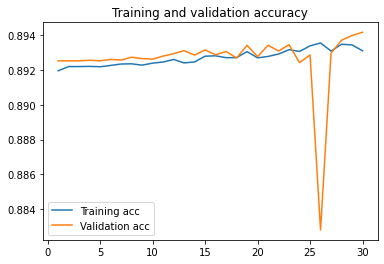

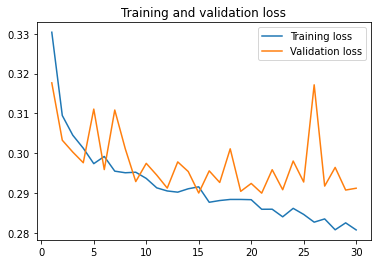

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']



epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
model.evaluate(test_data.tweet,test_data.IS_HT)

40/40 [==============================] - 15s 360ms/step - loss: 0.3754 - accuracy: 0.9137


[0.3753966689109802, 0.9136795997619629]